In [8]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serf'
import matplotlib.pyplot as plt
import numpy as np

In [56]:
def solve_ftcs(f, v, dx, dt):
    f_next = np.zeros(len(f))
    f_next = f - v * dt / 2.0 / dx * (np.roll(f,-1) - np.roll(f, 1))
    return f_next

def solve_lax(f, v, dx, dt):
    f_next = np.zeros(len(f))
    f_next = 0.5 * (np.roll(f, 1) + np.roll(f, -1)) - v * dt / 2.0 / dx * (np.roll(f,-1) - np.roll(f, 1))
    return f_next

def solve_upwind(f, v, dx, dt):
    # f_next = np.zeros(len(f))
    f_next = f - v * dt / dx * (f - np.roll(f, 1))
    return f_next

def solve_leapfrog(f, f1, v, dx, dt):
    f_next = np.zeros(len(f))
    f_next = f1 - v * dt / dx * (np.roll(f,-1) - np.roll(f, 1))
    return f_next

def solve_lax_wendroff(f, v, dx, dt):
    f1 = 0.5 * (np.roll(f, 1) + f) - v * dt / 2.0 / dx * (f - np.roll(f, 1))
    f2 = 0.5 * (f + np.roll(f, -1)) - v * dt / 2.0 / dx * (np.roll(f, -1) - f)
    f_next = f - v * dt / dx * (f2 - f1)
    return f_next

In [77]:
def solve_lax_2d(f, vx, vy, dx, dy, dt):
    f_next = 0.25 * (np.roll(f, 1, axis=0) + np.roll(f, -1, axis=0) +
                     np.roll(f, 1, axis=1) + np.roll(f, -1, axis=1)) - \
              vx * dt / 2.0 / dx * (np.roll(f,-1, axis=1) - np.roll(f, 1, axis=1)) - \
              vy * dt / 2.0 / dy * (np.roll(f,-1, axis=0) - np.roll(f, 1, axis=0))
    return f_next

def upwind_2d(f, vx, vy, dx, dy, dt):
    f_next = f - vx * dt / dx * (f - np.roll(f, 1, axis=0)) - vy * dt / dy * (f - np.roll(f, 1, axis=1))
    return f_next

def solve_lax_wendroff_2d(f, vx, vy, dx, dy, dt):
    f1 = 0.5 * (np.roll(f, 1, axis=0) + f) - vx * dt / 2.0 / dx * (f - np.roll(f, 1, axis=0))
    f2 = 0.5 * (f + np.roll(f, -1, axis=0)) - vx * dt / 2.0 / dx * (np.roll(f, -1, axis=0) - f)
    f3 = 0.5 * (np.roll(f, 1, axis=1) + f) - vy * dt / 2.0 / dy * (f - np.roll(f, 1, axis=1))
    f4 = 0.5 * (f + np.roll(f, -1, axis=1)) - vy * dt / 2.0 / dy * (np.roll(f, -1, axis=1) - f)
    f_next = f - vx * dt / dx * (f2 - f1) - vy * dt / dy * (f4 - f3)
    return f_next

In [76]:
print(np.roll(y, -1, axis=0))

[[0.00787402 0.00787402 0.00787402 ... 0.00787402 0.00787402 0.00787402]
 [0.01574803 0.01574803 0.01574803 ... 0.01574803 0.01574803 0.01574803]
 [0.02362205 0.02362205 0.02362205 ... 0.02362205 0.02362205 0.02362205]
 ...
 [0.99212598 0.99212598 0.99212598 ... 0.99212598 0.99212598 0.99212598]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [78]:
nx = 128
ny = 128
lx = 1.0
ly = 1.0
dx = lx / nx
dy = ly / ny

xs = np.linspace(0, lx, nx)
ys = np.linspace(0, ly, ny)
x, y = np.meshgrid(xs, ys)

f = np.exp(-((x - 0.5)**2 + (y - 0.5)**2) / 0.05**2)
vx = 1.5
vy = 1.0

dt = 1.0 * dx / np.sqrt(vx**2 + vy**2) / np.sqrt(2.0)

freq = 5
for n in range(nx * 2):
    f = solve_lax_2d(f, vx, vy, dx, dy, dt)
    if n % freq == 0:
        plt.pcolor(x, y, f)
        plt.colorbar()
        plt.savefig(f'fig{n//freq:03d}.png', dpi=300, bbox_inches='tight')
        plt.close()


KeyboardInterrupt: 

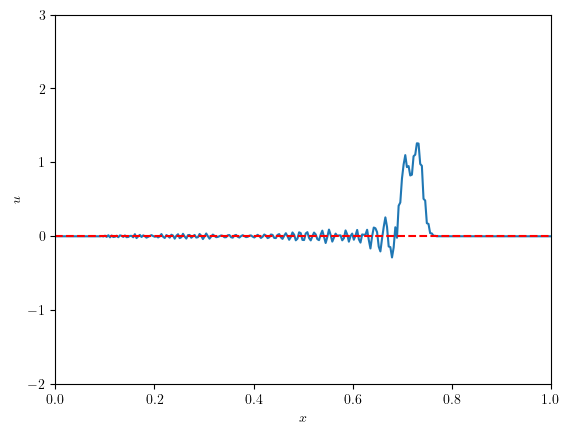

In [57]:
nx = 300
lx = 1.0
xs = np.linspace(0, lx, nx)
dx = xs[1] - xs[0]
dt = 0.9 * lx / nx

# f1 = np.exp(-((xs - 0.5) / 0.1)**2)
f1 = np.where((xs < 0.45) & (xs > 0.4), 1.0, 0.0)
f = solve_upwind(f1, 1.0, dx, dt)
# f = f1

freq = 3
for i in range(nx * 2):
    if i % freq == 0:
        plt.plot(xs, f1)
        ax = plt.gca()
        ax.set_xlabel("$x$")
        ax.set_ylabel("$u$")
        ax.set_ylim(-2.0, 3.0)
        ax.set_xlim(0.0, 1.0)
        ax.axhline(0.0, color='r', ls='--')
        plt.savefig("fig%03d.png" % (i/freq))
        plt.close()
    f_prev = f
    f = solve_leapfrog(f, f1, 1.0, dx, dt)
    f1 = f_prev
    # f = solve_lax(f, 1.0, dx, dt)

In [58]:
nx = 300
lx = 1.0
xs = np.linspace(0, lx, nx)
dx = xs[1] - xs[0]
dt = lx / nx

# f = np.exp(-((xs - 0.5) / 0.1)**2)
f = np.where((xs < 0.45) & (xs > 0.4), 1.0, 0.0)

freq = 3
for i in range(nx * 2):
    if i % freq == 0:
        plt.plot(xs, f)
        ax = plt.gca()
        ax.set_xlabel("$x$")
        ax.set_ylabel("$u$")
        ax.set_ylim(-2.0, 3.0)
        ax.set_xlim(0.0, 1.0)
        ax.axhline(0.0, color='r', ls='--')
        plt.savefig("fig%03d.png" % (i/freq))
        plt.close()
    f = solve_lax_wendroff(f, 1.0, dx, dt)